<a href="https://colab.research.google.com/github/maryawamaitha/Data-Visualization-Portfolio-Projects/blob/main/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Purpose of this project is to explore DATA VISUALIZATION

This Dataset includes information on The World Happiness Report in 2016 from Kaggle:
Some of the question I am hoping to answer include:

Which are the Top 10 Countries and the Bottom 10 Countries? 

Are there more Happy countries in a specific continent compared to another Continent?

Does A Good Economy of a Country translate to healthy Life Expectancy and a higher Happiness Score?

Does Trust(Government Corruption) Affect The Country and leading to a Lower Happiness Score?

In [ ]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Let's Explore the World Happiness dataset
df=pd.read_csv('/content/2016.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().round(2)

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,78.98,5.38,5.28,5.48,0.95,0.79,0.56,0.37,0.14,0.24,2.33
std,45.47,1.14,1.15,1.14,0.41,0.27,0.23,0.15,0.11,0.13,0.54
min,1.00,2.90,2.73,3.08,0.00,0.00,0.00,0.00,0.00,0.00,0.82
25%,40.00,4.40,4.33,4.46,0.67,0.64,0.38,0.26,0.06,0.15,2.03
50%,79.00,5.31,5.24,5.42,1.03,0.84,0.60,0.40,0.11,0.22,2.29
75%,118.00,6.27,6.15,6.43,1.28,1.02,0.73,0.48,0.18,0.31,2.66
max,157.00,7.53,7.46,7.67,1.82,1.18,0.95,0.61,0.51,0.82,3.84


Which are The Top 10 Countries?

In [ ]:
top_10 =df['Happiness Rank'] <= 10

df[top_10]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


Which are the Bottom 10 Countries

In [ ]:
bottom_10 = df['Happiness Rank'] >147
df[bottom_10]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


Let's Explore The Distribution of the Happiness Score among the Countries using a Histogram:

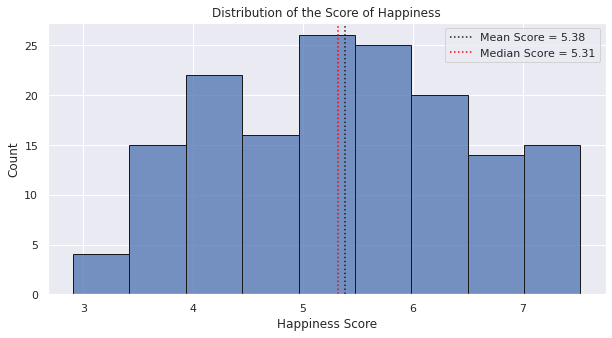

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=df, x='Happiness Score',edgecolor='k', ax=ax) 
ax.set(title='Distribution of the Score of Happiness')
ax.set_ylabel('Count')
ax.set_xlabel('Happiness Score')
mean_score = df['Happiness Score'].mean()
ax.axvline(mean_score,color='k', ls=':', 
           label=f"Mean Score = {round(mean_score,2)}");

med_score = df['Happiness Score'].median()
ax.axvline(med_score,color='red', ls=':', 
           label=f"Median Score = {round(med_score,2)}");
ax.legend();

A majority of the Countries have a Happiness Score around 5 in a score range of 2-8

BOXPLOT: How does Happiness Score vary the different Continents/Regions

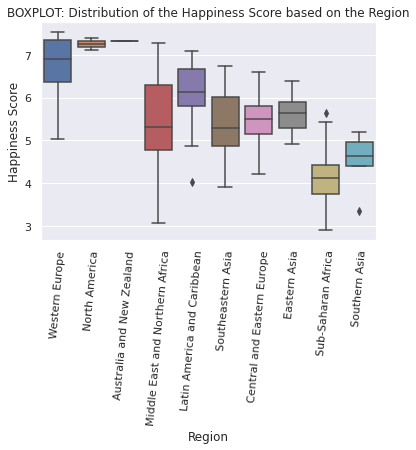

In [ ]:
sns.boxplot(data=df,x='Region',y='Happiness Score');
plt.xticks(rotation = 85);
plt.title('BOXPLOT: Distribution of the Happiness Score based on the Region');

The Top 3 Regions: 
- Western Europe
- North America
- Australia New Zealand

The Bottom 3 Regions:
- Eastern Asia
- Sub-Saharan Africa
- Southern Asia


Heat Map to show the Correlation of the different Variables in the Dataset


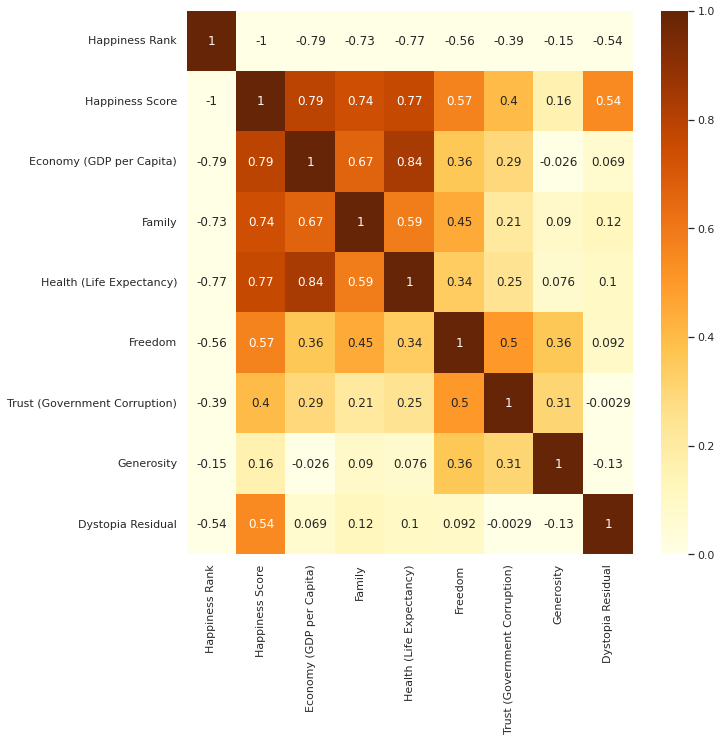

In [ ]:
df=df.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
corr = df.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corr,vmin=0, vmax=1,annot=True,cmap='YlOrBr');

Key Points:

- There is a Correlation between the GDP per Capita and the Healthy life Expectancy
- The Happiness Score and the Social support, GDP per Capital and Healthy Life expectancy

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


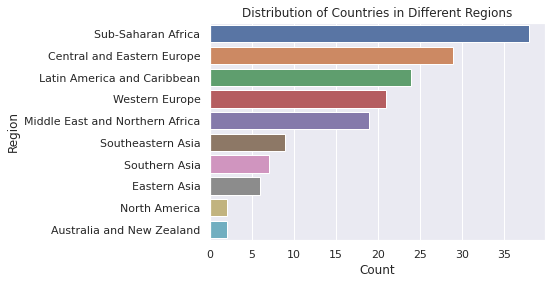

In [ ]:
print(df['Region'].value_counts())
sns.countplot(data=df, y='Region',order=df.Region.value_counts().index);
plt.title('Distribution of Countries in Different Regions');
plt.ylabel('Region', fontsize=12);
plt.xlabel('Count', fontsize=12);


Linear Correlation of Happiness Score and Economy(GDP per Capita)



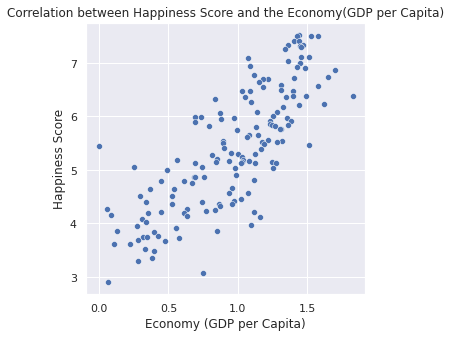

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score');
plt.title('Correlation between Happiness Score and the Economy(GDP per Capita)');


Based on the results from the plot: A Country's Economy has an impact on the overall hapiness score.

Does A Good Economy of a Country translate to healthy Life Expectancy and a higher Happiness Score?

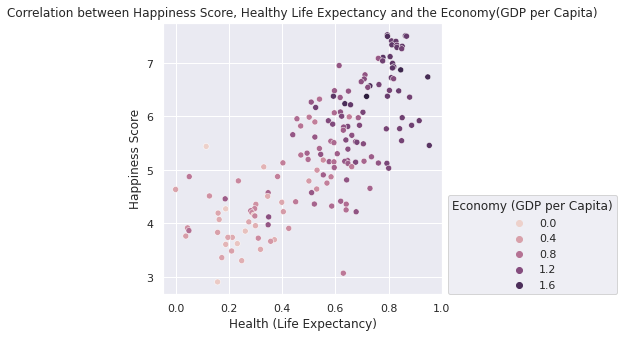

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='Health (Life Expectancy)', y='Happiness Score',hue='Economy (GDP per Capita)');
plt.title('Correlation between Happiness Score, Healthy Life Expectancy and the Economy(GDP per Capita)')

plt.legend(loc=(1.02,0), borderaxespad=0, title='Economy (GDP per Capita)');

Does Trust(Government Corruption) Affect The Country and leading to a Lower Happiness Score?

<Figure size 360x360 with 0 Axes>

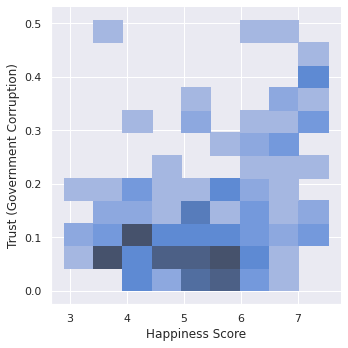

In [ ]:
plt.figure(figsize=[5,5])
sns.displot(data=df, y='Trust (Government Corruption)', x='Happiness Score');

Based on the results: There is no clear correlation between Trust(Government Corruption) and a Country's Happiness Score.